In [1]:
import pandas as pd
import numpy as snp
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import copy

In [2]:
df = pd.read_csv("student-mat.csv")

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0


In [6]:
#Filtrando alunos por escola
dfGP = df.loc[(df["school"]=="GP")]
dfMS = df.loc[(df["school"]=="MS")]

In [7]:
#Pode-se percerber um desbalanceamento dos dados quanto as amostras para cada escola
print(dfGP.shape)
print(dfMS.shape)

(349, 33)
(46, 33)


<AxesSubplot:>

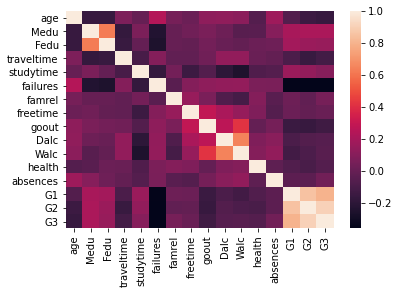

In [8]:
#Analizando correlação entre atributos
sns.heatmap(df.corr())

Text(0, 0.5, '% data distribution')

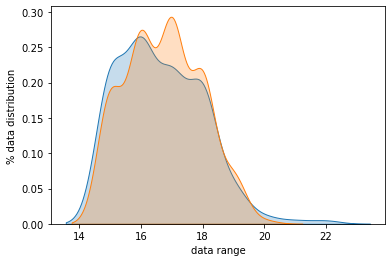

In [9]:
#Distribuição geral de alunos por sexo e idade
sns.kdeplot(df.groupby('sex').get_group('M')['age'], shade = True,label = 'male')
sns.kdeplot(df.groupby('sex').get_group('F')['age'], shade = True, label = 'female')
plt.xlabel('data range')
plt.ylabel('% data distribution')

In [10]:
df['mean_grades'] = (df.G1 + df.G2 + df.G3) / 3

(array([10., 17., 33., 43., 76., 73., 62., 52., 16., 13.]),
 array([ 1.33333333,  3.13333333,  4.93333333,  6.73333333,  8.53333333,
        10.33333333, 12.13333333, 13.93333333, 15.73333333, 17.53333333,
        19.33333333]),
 <BarContainer object of 10 artists>)

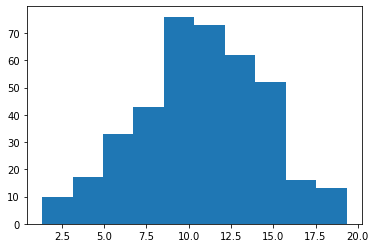

In [11]:
plt.hist(df.mean_grades)

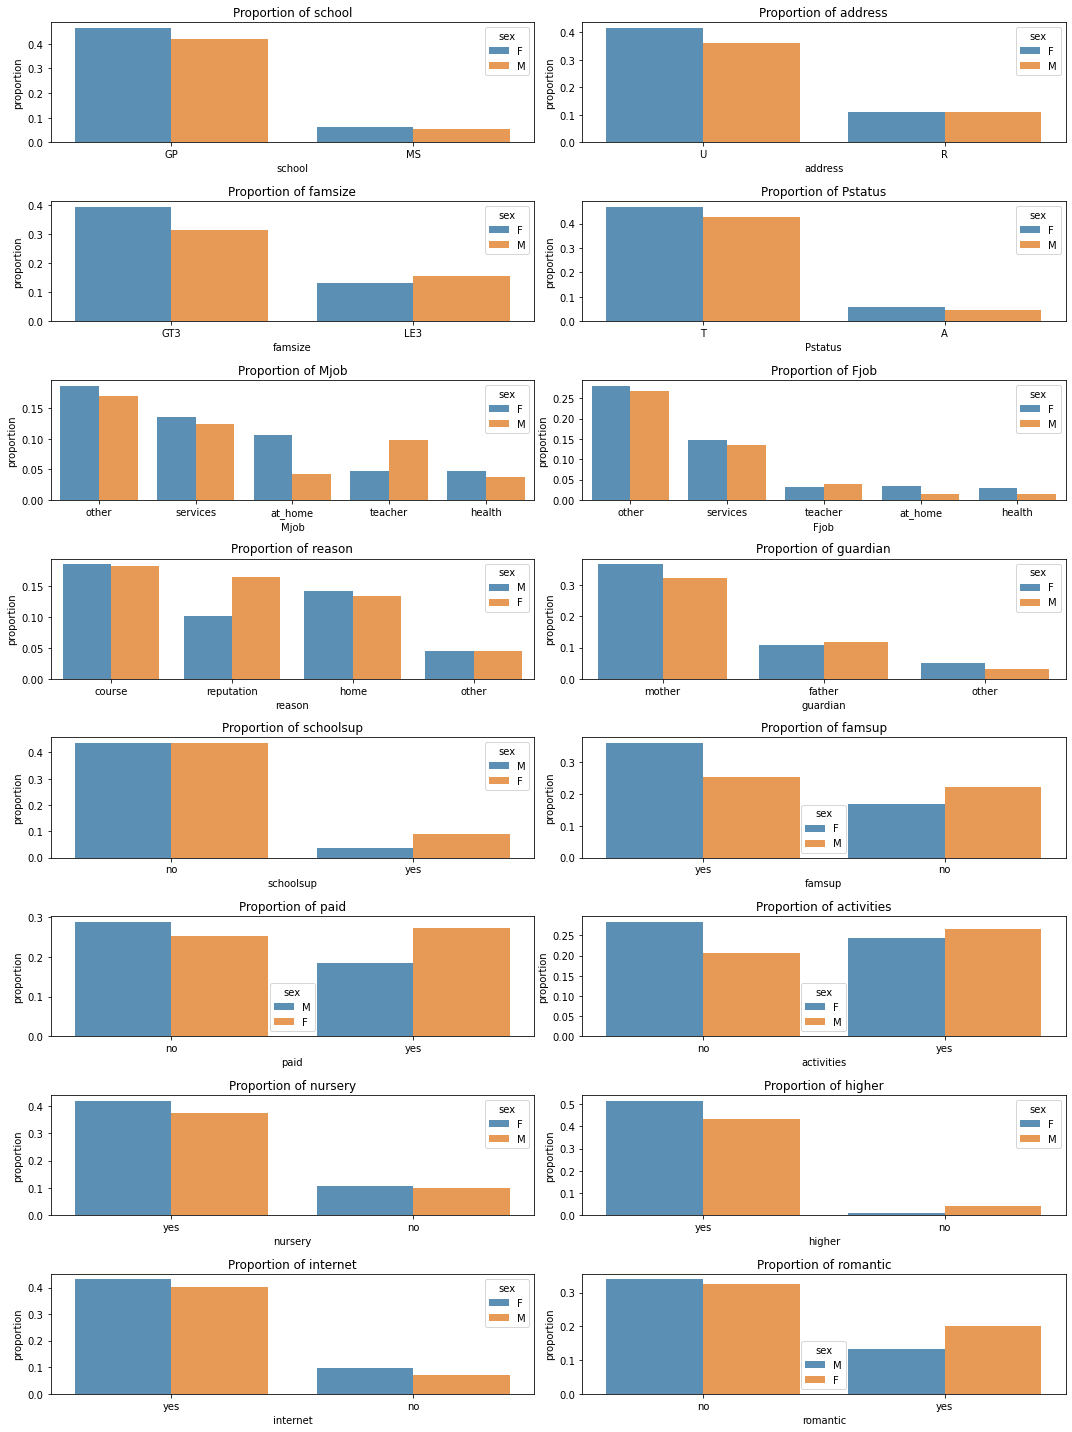

In [12]:
cols_obj = list(df.dtypes[df.dtypes == object].index[0:])
cols_obj.pop(1)
i=1
plt.figure(figsize=[15,20])
y, hue = 'proportion', 'sex'

for f in cols_obj:
    plt.subplot(8,2,i)
    df[[f, 'sex']]\
       .value_counts(normalize=True)\
       .rename(y)\
       .reset_index()\
       .pipe((sns.barplot, "data"), x=f, y='proportion', hue='sex', alpha=0.8)
    plt.title(f'Proportion of {f}')
    i+=1
plt.tight_layout()

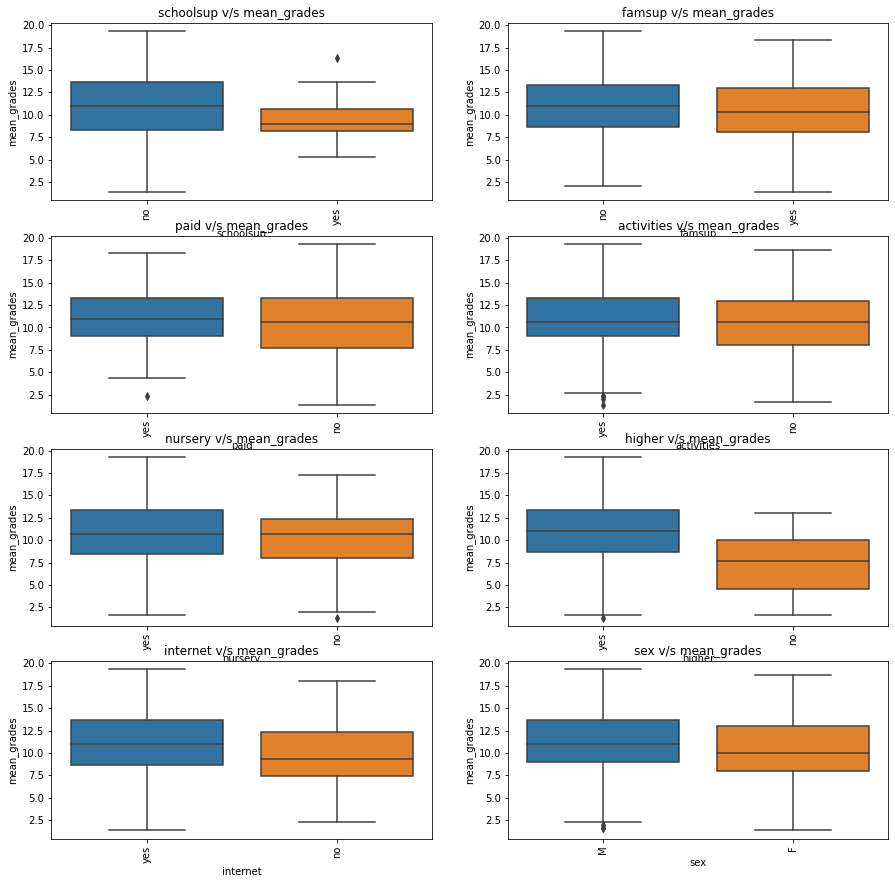

In [13]:
plt.figure(figsize = (15,15))
for i, item in enumerate(['schoolsup', 'famsup', 'paid','activities',
       'nursery', 'higher', 'internet', 'sex']):
    plt.subplot(4,2,i+1)
    order_by = df.groupby(item)['mean_grades'].median().sort_values(ascending = False).index
    sns.boxplot(x = df[item], y = df['mean_grades'],order = order_by)
    plt.xticks(rotation = 90)
    plt.title(item+' v/s mean_grades')

<AxesSubplot:xlabel='studytime', ylabel='mean_grades'>

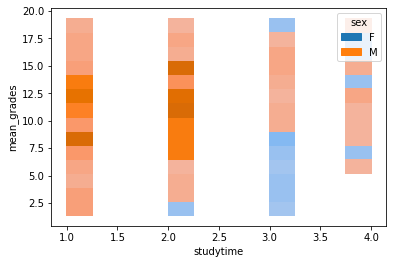

In [15]:
sns.histplot(data=df, x='studytime', y='mean_grades', hue='sex')